# Log 파일을 분단위로 잘라서 저장해봅시다.

In [54]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../dataset/track1.csv', index_col = "Timestamp")

In [4]:
df.index = pd.to_datetime(df.index)

## 우리가 공격자라고 생각하는 호스트는 전부 공격자야!!

In [31]:
df['Attack'] = 0
df.head()

,Method,Protocol,Status,Referer,Path,Host,UA,Payload,Bytes,Attack
Timestamp,,,,,,,,,,
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-includes/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6226.0,0
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-login/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6226.0,0
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-register/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6232.0,0
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6248.0,0
2020-08-24 10:00:19,GET,HTTP/1.1,200,"""-""",/1000/wp-content/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6224.0,0


In [39]:
attacker = ['101.224.32.28', '231.211.11.16', '137.8.46.133', '100.200.156.222', '112.112.181.134', '188.45.31.10', '188.45.31.20', '188.45.31.30', '188.45.31.40', '14.135.56.110', '14.135.56.120', '14.135.56.130', '14.135.56.140']

In [40]:
df['Attack'] = np.where(df['Host'].isin(attacker), 1, 0)

In [41]:
df.head()

,Method,Protocol,Status,Referer,Path,Host,UA,Payload,Bytes,Attack
Timestamp,,,,,,,,,,
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-includes/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6226.0,1
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-login/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6226.0,1
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-register/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6232.0,1
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6248.0,1
2020-08-24 10:00:19,GET,HTTP/1.1,200,"""-""",/1000/wp-content/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6224.0,1


## 공격자가 하나라도 있던 로그는 말이야... 전부 공격이 있었던 시간이야!!!

In [61]:
for minute in range(60):
    splitByMinute = df['2020-08-24 10:{0:02d}'.format(minute)]
    if len(splitByMinute[splitByMinute['Attack'] == 1]) > 0:
        splitByMinute.to_csv('../split_by_1min/2020-08-24_10-{0:02d}-1.csv'.format(minute), header=None)
    else:
        splitByMinute.to_csv('../split_by_1min/2020-08-24_10-{0:02d}-0.csv'.format(minute), header=None)

# 오랜만에 OpenCV 등장...
## Jupyter notebook 상에서 실험하기 좋은 코드... imshow!!

In [57]:
def imshow(tit, image):
    plt.figure(figsize=(9,9))
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap="gray")
    plt.show()

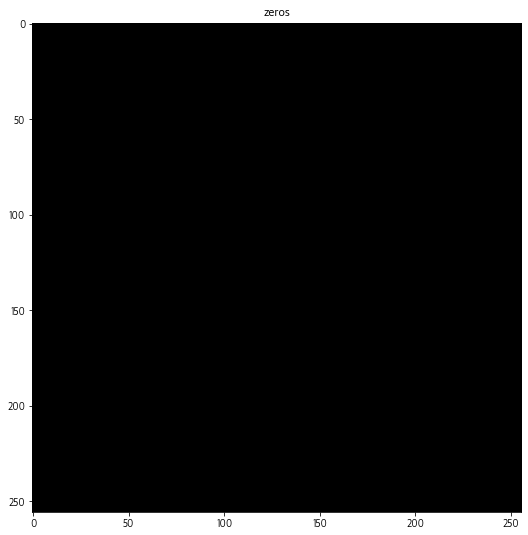

In [26]:
empty = np.zeros([256,256])
empty
imshow('zeros',empty)

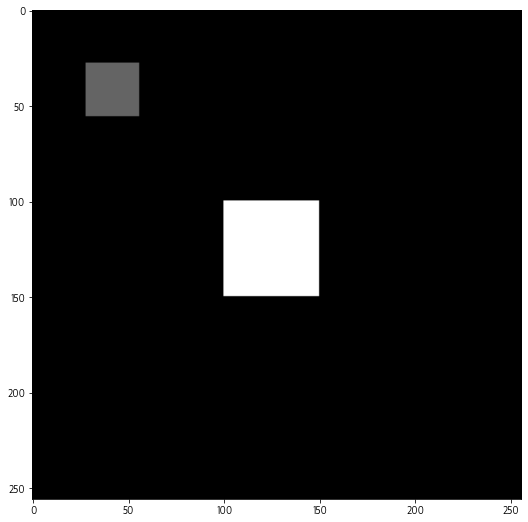

In [113]:
empty[28:56,28:56] = 100
empty[100:150,100:150] = 255
empty = empty.astype(np.uint8)
imshow('',empty)

In [74]:
with open('../hex_by_1min/2020-08-24_10-00-1.hex') as file :
    data = file.read()
    
data = bytes.fromhex(data[0:])

In [38]:
hex1 = pd.read_csv('../hex_by_1min/2020-08-24_10-00-1.csv', header=None)

In [54]:
hex1

,0
0,323032302d30382d32342031303a30303a31382c474554...
1,2e312c3230302c2222222d2222222c2f313030302f7770...
2,65732f2c3130312e3232342e33322e32382c4d6f7a696c...
3,284d6163696e746f73683b20496e74656c204d6163204f...
4,3b2072763a34322e3029204765636b6f2f323031303031...
5,666f782f34322e302c2d2c363232362e302c310a323032...
6,2031303a30303a31382c4745542c485454502f312e312c...
7,2d2222222c2f313030302f77702d6c6f67696e2f2c3130...
8,322e32382c4d6f7a696c6c612f352e3020284d6163696e...
9,6e74656c204d6163204f53205820782e793b2072763a34...


In [10]:
%%writefile app.py

from subprocess import call
call('pwd')

splitFilePath = '../split_by_1min/'
hexFilePath = '../hex_by_1min'



splitFileName = '2020-08-24_10-00-1.csv'

call(['hexdump','-v','../split_by_1min/2020-08-24_10-00-1.csv'])

Overwriting app.py


In [18]:
opt1 = '\'/1'
opt2 = '\"%02X'
opt3 = '\"\''
print(opt1)
print(opt2)
print(opt3)


'/1
"%02X
"'


In [47]:
a = []
out = subprocess.check_output(['xxd','-p','../split_by_1min/2020-08-24_10-00-1.csv'])
out = str(out)
out = out[2:-1].replace('\\n', '')
out

'323032302d30382d32342031303a30303a31382c4745542c485454502f312e312c3230302c2222222d2222222c2f313030302f77702d696e636c756465732f2c3130312e3232342e33322e32382c4d6f7a696c6c612f352e3020284d6163696e746f73683b20496e74656c204d6163204f53205820782e793b2072763a34322e3029204765636b6f2f32303130303130312046697265666f782f34322e302c2d2c363232362e302c310a323032302d30382d32342031303a30303a31382c4745542c485454502f312e312c3230302c2222222d2222222c2f313030302f77702d6c6f67696e2f2c3130312e3232342e33322e32382c4d6f7a696c6c612f352e3020284d6163696e746f73683b20496e74656c204d6163204f53205820782e793b2072763a34322e3029204765636b6f2f32303130303130312046697265666f782f34322e302c2d2c363232362e302c310a323032302d30382d32342031303a30303a31382c4745542c485454502f312e312c3230302c2222222d2222222c2f313030302f77702d72656769737465722f2c3130312e3232342e33322e32382c4d6f7a696c6c612f352e3020284d6163696e746f73683b20496e74656c204d6163204f53205820782e793b2072763a34322e3029204765636b6f2f32303130303130312046697265666f782f34322e302c2d2c363

In [61]:
print(len(out))
print(int(out[0:2], 16))
print(int(out[2:4], 16))
# print(list(out))
length = 2
result = list(map(''.join, zip(*[iter(out)]*length)))
result

3042
50
48


['32',
 '30',
 '32',
 '30',
 '2d',
 '30',
 '38',
 '2d',
 '32',
 '34',
 '20',
 '31',
 '30',
 '3a',
 '30',
 '30',
 '3a',
 '31',
 '38',
 '2c',
 '47',
 '45',
 '54',
 '2c',
 '48',
 '54',
 '54',
 '50',
 '2f',
 '31',
 '2e',
 '31',
 '2c',
 '32',
 '30',
 '30',
 '2c',
 '22',
 '22',
 '22',
 '2d',
 '22',
 '22',
 '22',
 '2c',
 '2f',
 '31',
 '30',
 '30',
 '30',
 '2f',
 '77',
 '70',
 '2d',
 '69',
 '6e',
 '63',
 '6c',
 '75',
 '64',
 '65',
 '73',
 '2f',
 '2c',
 '31',
 '30',
 '31',
 '2e',
 '32',
 '32',
 '34',
 '2e',
 '33',
 '32',
 '2e',
 '32',
 '38',
 '2c',
 '4d',
 '6f',
 '7a',
 '69',
 '6c',
 '6c',
 '61',
 '2f',
 '35',
 '2e',
 '30',
 '20',
 '28',
 '4d',
 '61',
 '63',
 '69',
 '6e',
 '74',
 '6f',
 '73',
 '68',
 '3b',
 '20',
 '49',
 '6e',
 '74',
 '65',
 '6c',
 '20',
 '4d',
 '61',
 '63',
 '20',
 '4f',
 '53',
 '20',
 '58',
 '20',
 '78',
 '2e',
 '79',
 '3b',
 '20',
 '72',
 '76',
 '3a',
 '34',
 '32',
 '2e',
 '30',
 '29',
 '20',
 '47',
 '65',
 '63',
 '6b',
 '6f',
 '2f',
 '32',
 '30',
 '31',
 '30',
 '30',
 '31',

In [93]:
result_int = [int(x, 16) for x in result]
result_int

[50,
 48,
 50,
 48,
 45,
 48,
 56,
 45,
 50,
 52,
 32,
 49,
 48,
 58,
 48,
 48,
 58,
 49,
 56,
 44,
 71,
 69,
 84,
 44,
 72,
 84,
 84,
 80,
 47,
 49,
 46,
 49,
 44,
 50,
 48,
 48,
 44,
 34,
 34,
 34,
 45,
 34,
 34,
 34,
 44,
 47,
 49,
 48,
 48,
 48,
 47,
 119,
 112,
 45,
 105,
 110,
 99,
 108,
 117,
 100,
 101,
 115,
 47,
 44,
 49,
 48,
 49,
 46,
 50,
 50,
 52,
 46,
 51,
 50,
 46,
 50,
 56,
 44,
 77,
 111,
 122,
 105,
 108,
 108,
 97,
 47,
 53,
 46,
 48,
 32,
 40,
 77,
 97,
 99,
 105,
 110,
 116,
 111,
 115,
 104,
 59,
 32,
 73,
 110,
 116,
 101,
 108,
 32,
 77,
 97,
 99,
 32,
 79,
 83,
 32,
 88,
 32,
 120,
 46,
 121,
 59,
 32,
 114,
 118,
 58,
 52,
 50,
 46,
 48,
 41,
 32,
 71,
 101,
 99,
 107,
 111,
 47,
 50,
 48,
 49,
 48,
 48,
 49,
 48,
 49,
 32,
 70,
 105,
 114,
 101,
 102,
 111,
 120,
 47,
 52,
 50,
 46,
 48,
 44,
 45,
 44,
 54,
 50,
 50,
 54,
 46,
 48,
 44,
 49,
 10,
 50,
 48,
 50,
 48,
 45,
 48,
 56,
 45,
 50,
 52,
 32,
 49,
 48,
 58,
 48,
 48,
 58,
 49,
 56,
 44,
 71,
 69,
 84

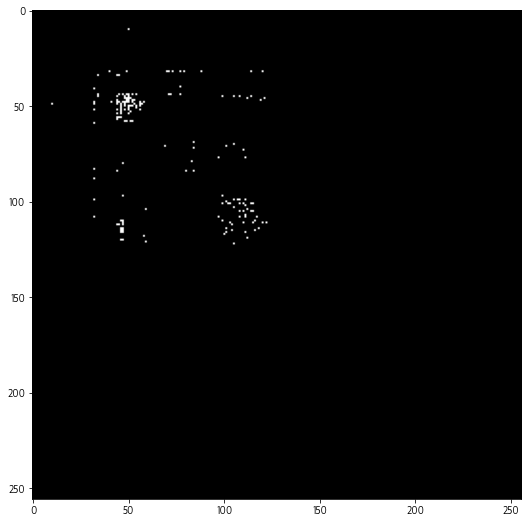

In [82]:
empty = np.zeros([256,256])
for i in range(len(result) - 1):
    empty[int(result[i], 16), int(result[i+1], 16)] = 1
imshow('',empty)
